# Customer churn prediction

**Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.**

This dataset provides us information of customers and churn value showing in '1' or '0'.

By making a prediction model for such dataset, we can predict if a customer is going to leave or not and what are the factor responsible for a customer churning.

Customer churn prediction dataset consists following columns:

CustomerID: Unique identifier for each customer.

Name: Name of the customer.

Age: Age of the customer.

Gender: Gender of the customer (Male or Female).

Location: Location where the customer is based, with options including Houston, Los Angeles, Miami, Chicago, and New York.

Subscription_Length_Months: The number of months the customer has been subscribed.

Monthly_Bill: Monthly bill amount for the customer.

Total_Usage_GB: Total usage in gigabytes.

Churn: A binary indicator (1 or 0) representing whether the customer has churned (1) or not (0).

In [35]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
#read and print data
customer_churn = pd.read_excel(r'C:\Users\hande\jupyter\logistic regression\customer_churn_large_dataset.xlsx')
customer_churn

CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2                               5         85.47             460      0  
3                               3         97.94             297      1  
4                              19         58.14             266      0  
...                           ...           ...             ...    ...  
99995                          23         55.13             226      1  
99996                          19         61.65             351      0  
99997                          17         96.11             251      1  
99998                          20         49.25             434      1  
99999                          19         76.57             173      1  

[100000 rows x 9 columns]

# Data exploration and cleaning

In [8]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**We can see that we have 6 numerical and 3 categorical columns**

In [37]:
#it is clear that our dataset does not have any null values, still we can also check it using:
customer_churn.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**We do not have any null values**

In [38]:
# Check for duplicate rows in dataset based on CustomerId column

duplicate = customer_churn[customer_churn.duplicated('CustomerID', keep = False)]
print(duplicate)
#empty dataframe represents that there are no duplicates in our dataset

Empty DataFrame
Columns: [CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn]
Index: []


**We do not have any duplicate values, so now we can drop CustomerID, Name attributes as they does not contribute anything to our analysis**

In [39]:
#drop customerID and name attributes from dataframe
customer_churn.drop(['CustomerID', 'Name'], axis = 1, inplace = True)
customer_churn.head()

Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0   63    Male  Los Angeles                          17         73.36   
1   62  Female     New York                           1         48.76   
2   24  Female  Los Angeles                           5         85.47   
3   36  Female        Miami                           3         97.94   
4   46  Female        Miami                          19         58.14   

   Total_Usage_GB  Churn  
0             236      0  
1             172      0  
2             460      0  
3             297      1  
4             266      0

**Let's understand our attributes and if we need to make any changes in them**

In [40]:
customer_churn['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

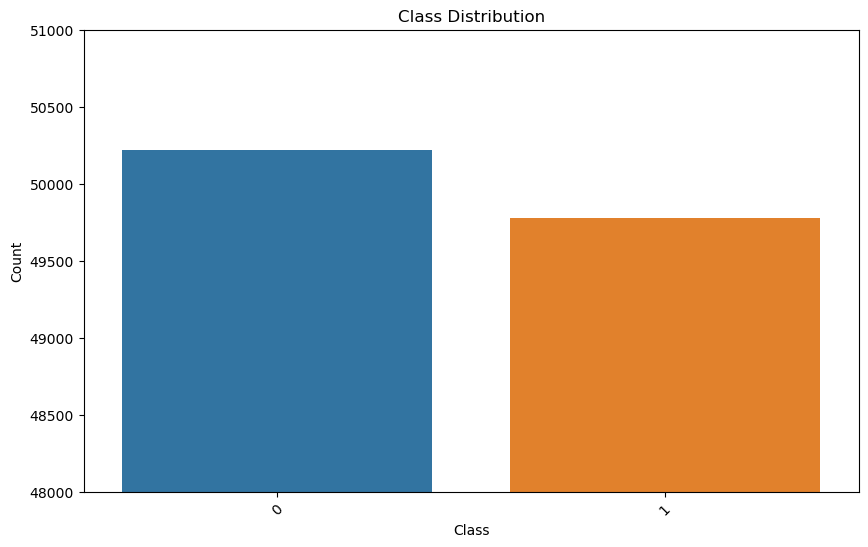

In [41]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x=customer_churn['Churn'],data=customer_churn)
plt.ylim(48000,51000)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

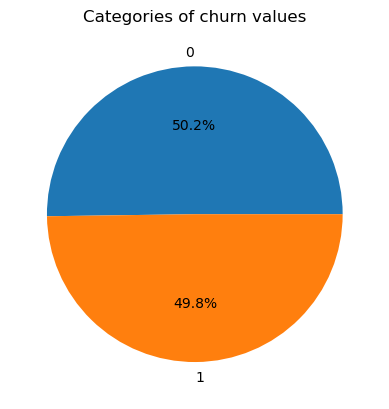

In [120]:
temp = customer_churn['Churn'].value_counts()
plt.pie(temp,labels=temp.index, autopct='%1.1f%%')
plt.title( 'Categories of churn values')
plt.show()

In [42]:
#first creating a list of numerical attributes of dataframe

numerical = customer_churn.select_dtypes(include='number')
numerical = list(numerical.columns)
print(numerical)

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


In [43]:
#first creating a list of categorical attributes of dataframe

categorical = customer_churn.select_dtypes(exclude='number')
categorical = list(categorical.columns)
print(categorical)

['Gender', 'Location']


**Distribution of values in our numerical column**

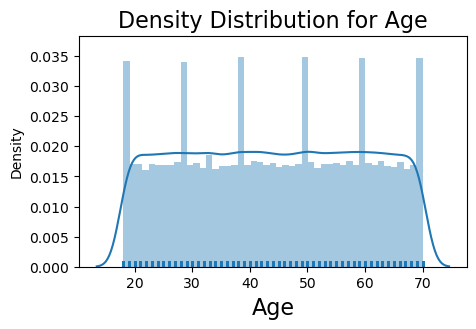

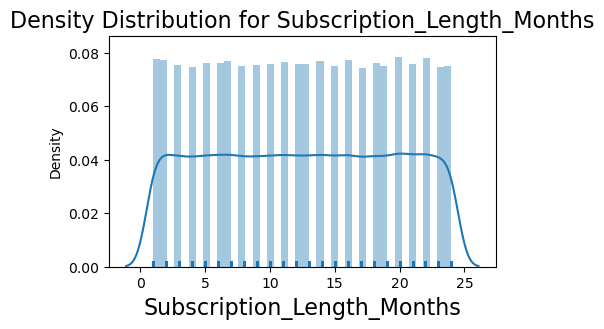

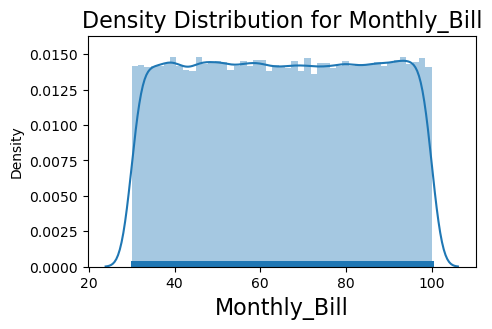

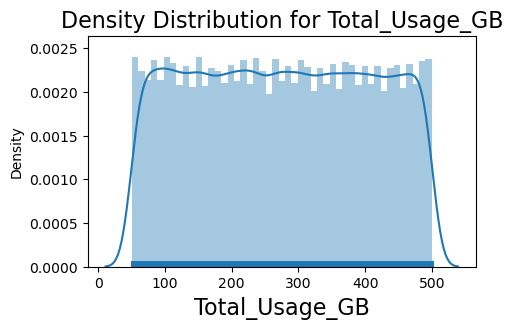

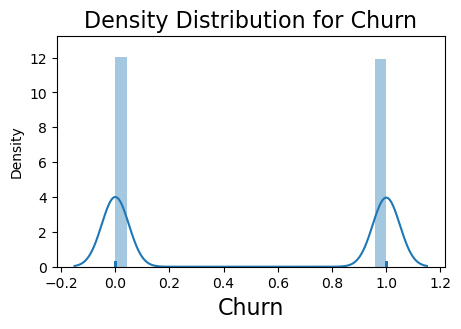

In [44]:
#Defining a function to plot distribution
   
for i in scale_cols:
    plt.figure(figsize=(5,3))
    sns.distplot(customer_churn[i],rug = True)
    plt.title(f'Density Distribution for {i}',fontsize=16)
    plt.xlabel(i,fontsize=16)
    plt.show()

**Density distribution of our numerical attributes gives us the following insights:**

1. We have many unique values in each column, but they're all almost balanced.
2. We have almost balanced dependent variable


**Distribution of values in our categorical column**

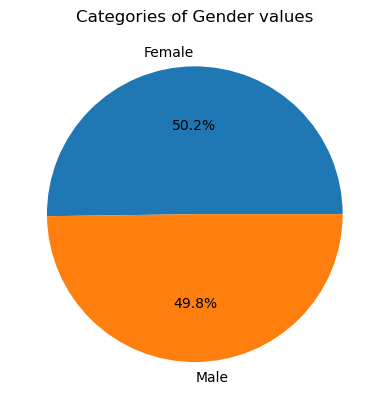

In [123]:
temp = customer_churn['Gender'].value_counts()
plt.pie(temp,labels=temp.index, autopct='%1.1f%%')
plt.title( 'Categories of Gender values')
plt.show()

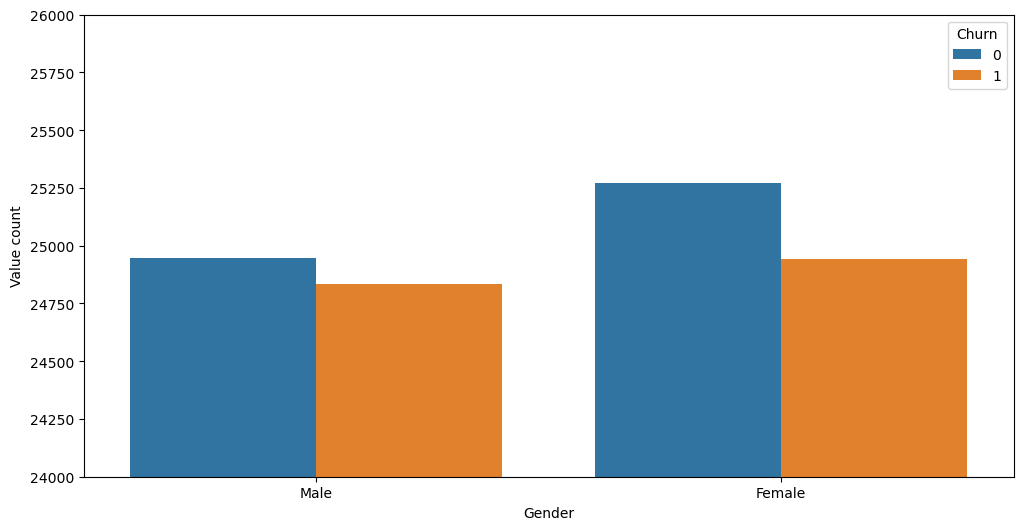

In [45]:

fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
sns.countplot(x='Gender', hue="Churn", data=customer_churn)
plt.ylim(24000,26000)
ax.set_xlabel('Gender')
ax.set_ylabel('Value count')
plt.show()

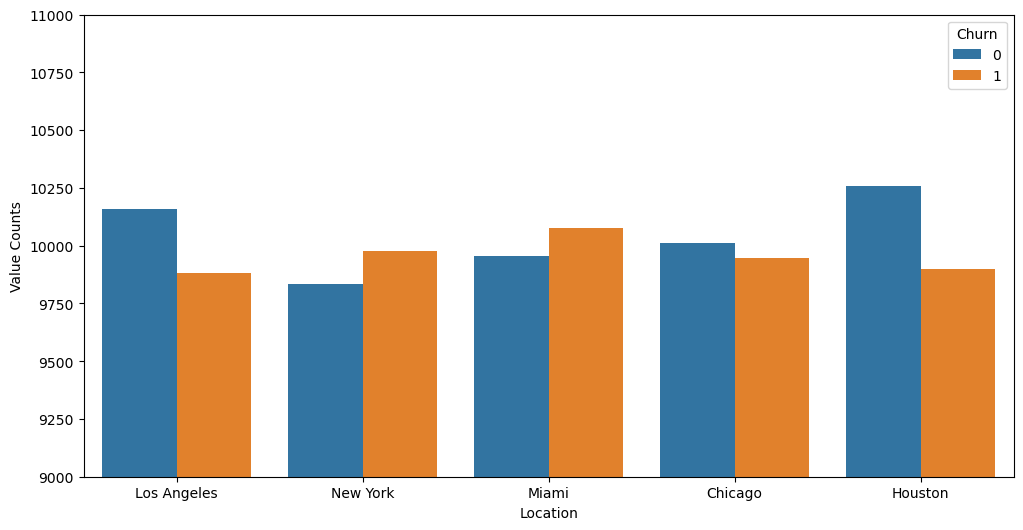

In [47]:

fig, ax = plt.subplots(figsize=(12,6), dpi=100)

sns.countplot(x='Location', hue="Churn", data=customer_churn)
plt.ylim(9000,11000)
ax.set_xlabel('Location')
ax.set_ylabel('Value Counts')

plt.show()

<Axes: >

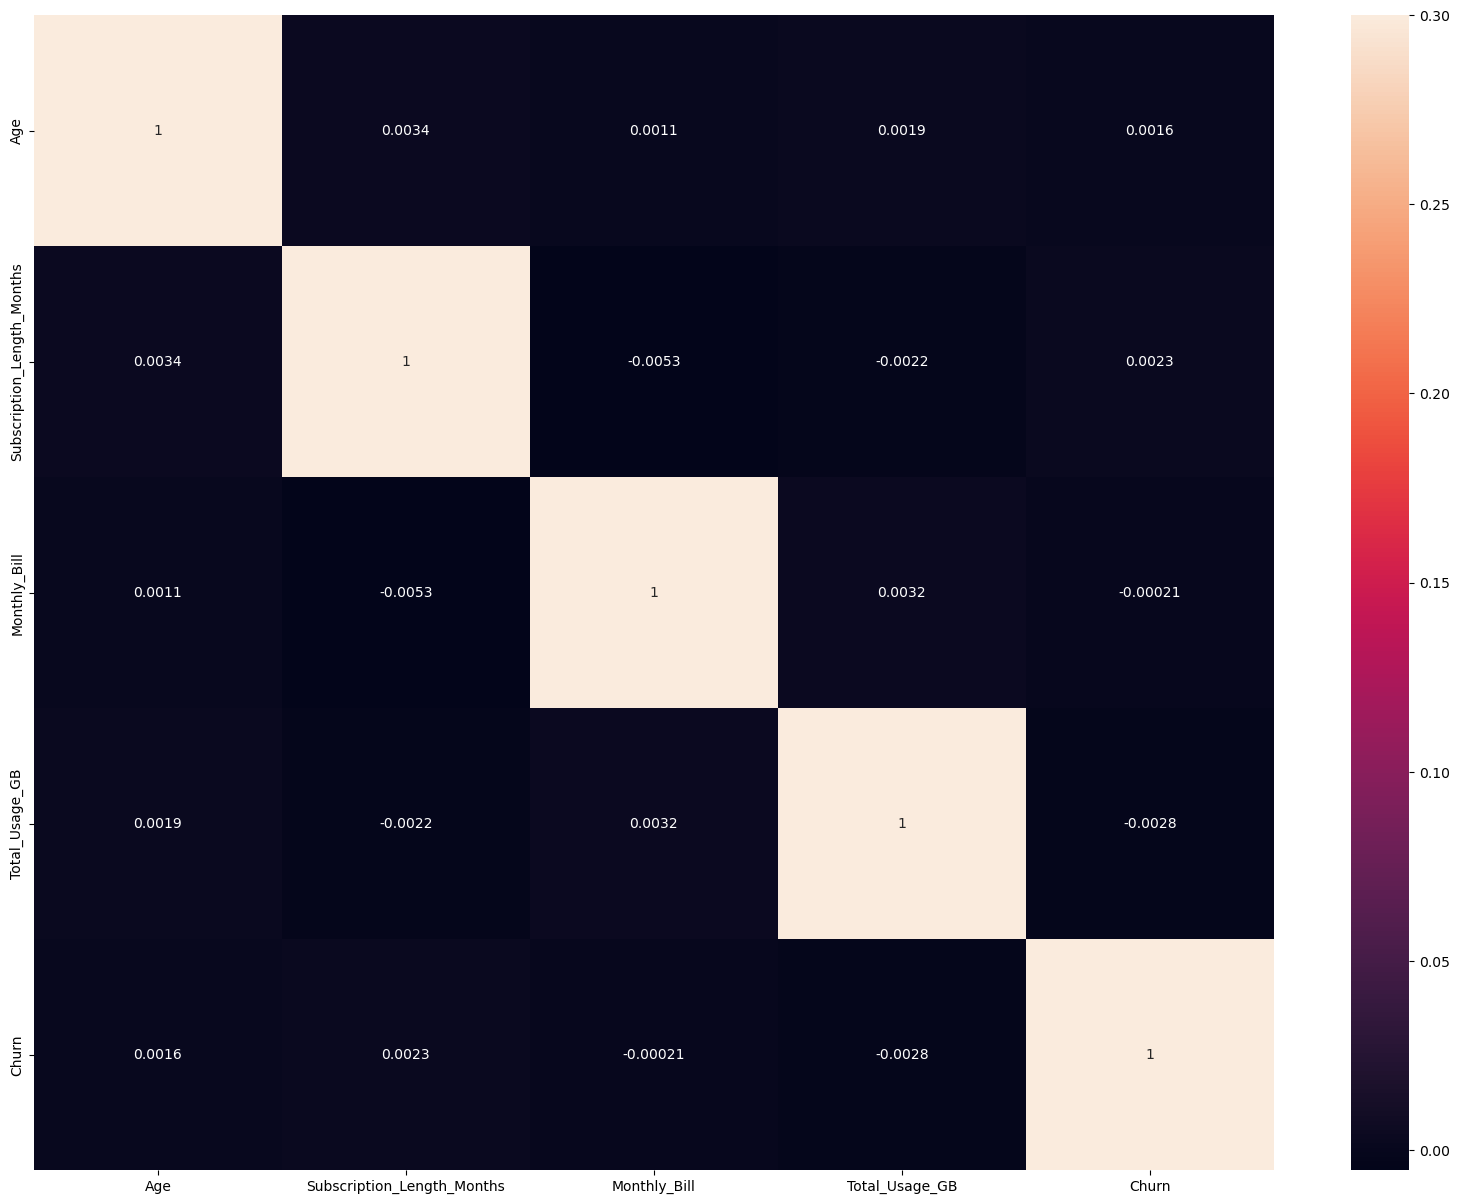

In [48]:
#Correlation between all variables of the dataset.

f, ax = plt.subplots(figsize=(20, 15))
corr = customer_churn.corr()
sns.heatmap(corr,  vmax=.3, annot=True)

**No multicollinearity in our dataset, so all the remaining columns of our dataset are equally important for predicting our class variable**

# Feature Engineering: Encoding of categorical variables and Normalization of numerical variables

In [50]:
#Gender and Location are two categorical variables in our dataset

# np.where(customer_churn['Gender']=='Male',0,1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
customer_churn.Gender = label.fit_transform(customer_churn.Gender)

customer_churn = pd.get_dummies(customer_churn)
print(customer_churn.head())

   Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  Location_Chicago  Location_Houston  Location_Los Angeles  \
0      0                 0                 0                     1   
1      0                 0                 0                     0   
2      0                 0                 0                     1   
3      1                 0                 0                     0   
4      0                 0                 0                     0   

   Location_Miami  Location_New York  
0               0                  0  
1               0                  1  
2    

In [51]:
scale_cols = ['Age','Subscription_Length_Months','Total_Usage_GB', 'Monthly_Bill']

# now we will apply scaling/normalization on all numerical data to avoid biased prediction

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
customer_churn[scale_cols] = scale.fit_transform(customer_churn[scale_cols])
customer_churn

Age  Gender  Subscription_Length_Months  Monthly_Bill  \
0      0.865385       1                    0.695652      0.619429   
1      0.846154       0                    0.000000      0.268000   
2      0.115385       0                    0.173913      0.792429   
3      0.346154       0                    0.086957      0.970571   
4      0.538462       0                    0.782609      0.402000   
...         ...     ...                         ...           ...   
99995  0.288462       1                    0.956522      0.359000   
99996  0.846154       0                    0.782609      0.452143   
99997  0.884615       1                    0.695652      0.944429   
99998  0.634615       0                    0.826087      0.275000   
99999  0.173077       0                    0.782609      0.665286   

       Total_Usage_GB  Churn  Location_Chicago  Location_Houston  \
0            0.413333      0                 0                 0   
1            0.271111      0                 0                 0   
2            0.911111      0                 0                 0   
3            0.548889      1                 0                 0   
4            0.480000      0                 0                 0   
...               ...    ...               ...               ...   
99995        0.391111      1                 0                 1   
99996        0.668889      0                 0                 0   
99997        0.446667      1                 1                 0   
99998        0.853333      1                 0                 0   
99999        0.273333      1                 0                 0   

       Location_Los Angeles  Location_Miami  Location_New York  
0                         1               0                  0  
1                         0               0                  1  
2                         1               0                  0  
3                         0               1                  0  
4                         0               1                  0  
...                     ...             ...                ...  
99995                     0               0                  0  
99996                     0               0                  1  
99997                     0               0                  0  
99998                     0               0                  1  
99999                     1               0                  0  

[100000 rows x 11 columns]

# Split Dataset into training and test

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [102]:
X = customer_churn.drop(columns = ['Churn'])
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 10), (30000, 10), (70000,), (30000,))

In [66]:
y_train.value_counts()

0    35155
1    34845
Name: Churn, dtype: int64

In [67]:
y_test.value_counts()

0    15066
1    14934
Name: Churn, dtype: int64

# Model Selection 



**Logistic Regression**

In [77]:
#As we just want to classify in 2 categories we can use numerous model like logistic regression, support vector machine,
#decision tree, random forest etc.
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.4986333333333333
              precision    recall  f1-score   support

           0       0.50      0.64      0.56     15066
           1       0.50      0.36      0.41     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



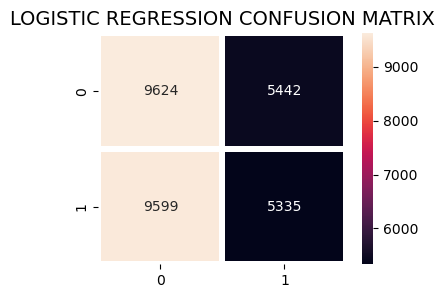

In [89]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

**AdaBoost Classifier**

In [70]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy: ", metrics.accuracy_score(y_test, a_preds))
print(classification_report(y_test, a_preds))

AdaBoost Classifier accuracy:  0.49643333333333334
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     15066
           1       0.49      0.42      0.46     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



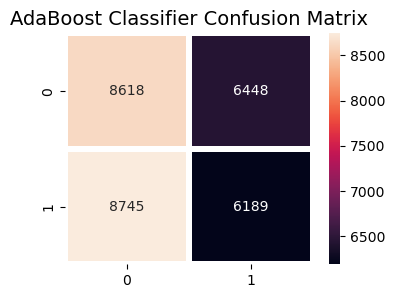

In [111]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

**Random forest classifier**

In [81]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print("Random forest classifier accuracy: ",metrics.accuracy_score(y_test, prediction_test))
print()
print(classification_report(y_test, prediction_test))

Random forest classifier accuracy:  0.5003

              precision    recall  f1-score   support

           0       0.50      0.66      0.57     15066
           1       0.50      0.34      0.40     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



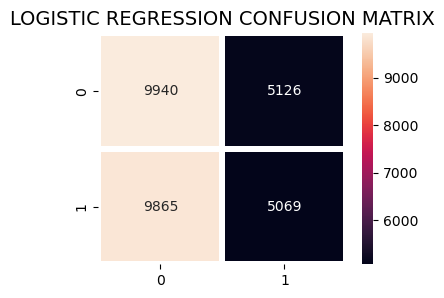

In [88]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**Decision Tree Classifier**

In [104]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.5056
              precision    recall  f1-score   support

           0       0.51      0.50      0.51     15066
           1       0.50      0.51      0.51     14934

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



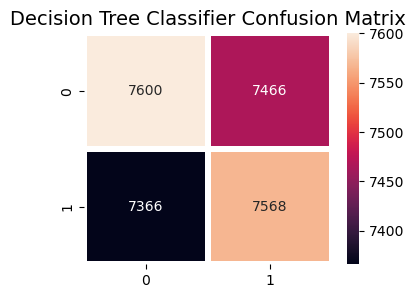

In [106]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=14)
plt.show()

**K Nearest Neighbour (KNN) Classifier**

In [108]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))

KNN accuracy: 0.5006333333333334
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15066
           1       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



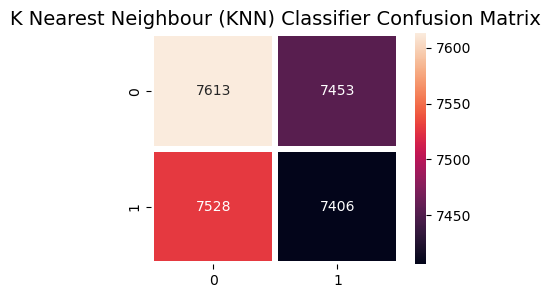

In [110]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("K Nearest Neighbour (KNN) Classifier Confusion Matrix",fontsize=14)
plt.show()

* Most algorithms have mediocre performance on the test data, with accuracy close to random guessing (around 0.5).

* No algorithm is performing well, so I decided to take only 4 variables and removed the age and location variables to build model again.


In [91]:
X_train = X_train[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

X_test = X_test[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

print('X_train columns:', X_train.columns)
print('-'*100)
print('X_test columns:', X_test.columns)

X_train columns: Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_test columns: Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')


**LogisticRegression**

In [114]:
lr_model1 = LogisticRegression()
lr_model1.fit(X_train,y_train)
accuracy_lr = lr_model1.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print()
lr_pred= lr_model1.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.4986333333333333

              precision    recall  f1-score   support

           0       0.50      0.64      0.56     15066
           1       0.50      0.36      0.41     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



**AdaBoostClassifier**

In [113]:
a_model1 = AdaBoostClassifier()
a_model1.fit(X_train,y_train)
a_preds = a_model1.predict(X_test)
print("AdaBoost Classifier accuracy: ", metrics.accuracy_score(y_test, a_preds))
print()
print(classification_report(y_test, a_preds))

AdaBoost Classifier accuracy:  0.49643333333333334

              precision    recall  f1-score   support

           0       0.50      0.57      0.53     15066
           1       0.49      0.42      0.46     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



**RandomForestClassifier**

In [100]:
model_rf1 = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =20, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf1.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf1.predict(X_test)
print("Random forest classifier accuracy: ",metrics.accuracy_score(y_test, prediction_test))
print()
print(classification_report(y_test, prediction_test))

Random forest classifier accuracy:  0.4969

              precision    recall  f1-score   support

           0       0.50      0.61      0.55     15066
           1       0.49      0.39      0.43     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



**Decision Tree Classifier**

In [112]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(X_train,y_train)
predictdt_y = dt_model1.predict(X_test)
accuracy_dt = dt_model1.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print()
print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.5055333333333333

              precision    recall  f1-score   support

           0       0.51      0.50      0.51     15066
           1       0.50      0.51      0.51     14934

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



**KNeighbors Classifier**

In [115]:
knn_model1 = KNeighborsClassifier(n_neighbors = 11) 
knn_model1.fit(X_train,y_train)
predicted_y = knn_model1.predict(X_test)
accuracy_knn = knn_model1.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print()
print(classification_report(y_test, predicted_y))

KNN accuracy: 0.5006333333333334

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15066
           1       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



* All the algorithms have mediocre performance remain , with accuracy close to random guessing (around 0.5).
* There is no any effect  of removing Age and Location columns on model performance.

**In all the model Decision Tree Classifier have better accuracy than any other model**


**Save model in a pickle file**

In [ ]:
import joblib

joblib.dump(dt_model, 'customer_churn_classifier.pkl')

**Conclusion :**

The outcome of this customer churn prediction project involves developing a machine learning model to predict whether customers are likely to churn or not. This prediction is based on various customer attributes such as age, gender, location, subscription length, monthly bill, and total usage. The model's primary purpose is to assist in identifying customers who are at a higher risk of churning, enabling the business to take proactive measures to retain them. By using the trained model to predict churn, the company can allocate resources more effectively, personalize engagement strategies, and implement targeted retention efforts. Ultimately, the project's success is measured by the model's ability to make predictions, helping the company reduce churn rates, improve customer satisfaction, and optimize its customer retention strategies.